In [80]:
import numpy as np
import matplotlib.pyplot as plt

### выборка

In [103]:
N = 25
np.random.seed(42)
X = np.random.sample(25)
X = np.around(np.array(np.random.exponential(1, size = N)), 3)
X                         

array([1.538, 0.223, 0.722, 0.898, 0.048, 0.935, 0.187, 0.067, 2.974,
       3.371, 1.652, 0.363, 0.103, 1.153, 0.58 , 0.13 , 0.684, 0.035,
       2.4  , 0.299, 1.086, 0.374, 0.734, 0.791, 0.204])

### вариационный ряд

In [104]:
X1 = np.sort(X)
X1

array([0.035, 0.048, 0.067, 0.103, 0.13 , 0.187, 0.204, 0.223, 0.299,
       0.363, 0.374, 0.58 , 0.684, 0.722, 0.734, 0.791, 0.898, 0.935,
       1.086, 1.153, 1.538, 1.652, 2.4  , 2.974, 3.371])

### мода, медиана, размах

In [105]:
print('размах = ',  X1[N-1] - X1[0])
print('медиана = ',  X1[13])
print('мода = ',  X1)

размах =  3.336
медиана =  0.722
мода =  [0.035 0.048 0.067 0.103 0.13  0.187 0.204 0.223 0.299 0.363 0.374 0.58
 0.684 0.722 0.734 0.791 0.898 0.935 1.086 1.153 1.538 1.652 2.4   2.974
 3.371]


### Эмпирическая функция

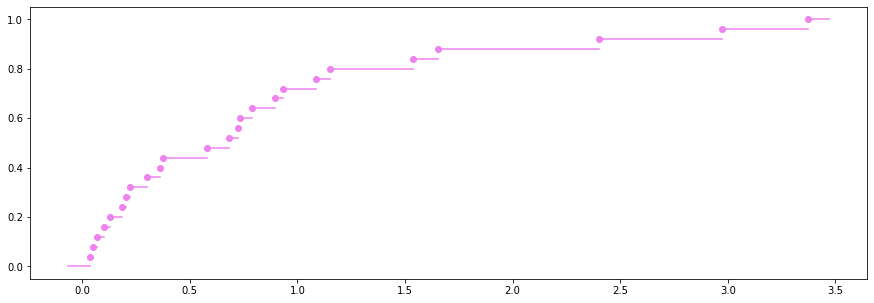

In [106]:
fig, ax = plt.subplots(figsize = (15, 5))
plt.plot([X1[0]-0.1, X1[0]], [0, 0], color = "violet")
for i in range(N-1):
    plt.plot(X1[i:i+2], [(i + 1) / N]*2, color = "violet")
plt.plot([X1[-1], X1[-1] + 0.1], [1,1], color = "violet")
plt.scatter(X1, [i / N for i in range(1, 26)], color = 'violet')
plt.show()

###  Гистограмма

In [107]:
k = 5
h = list(np.histogram(X1, bins = k))
h[0] = h[0]/N
h[0] = [h[0][i]/(h[1][i+1]-h[1][i]) for i in range (len(h[0]))]
h

[[0.7793764988009593,
  0.419664268585132,
  0.11990407673860912,
  0.05995203836930454,
  0.11990407673860916],
 array([0.035 , 0.7022, 1.3694, 2.0366, 2.7038, 3.371 ])]

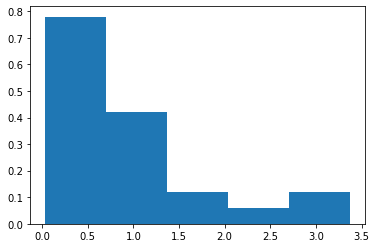

In [108]:
fig, ax = plt.subplots()
plt.hist(h[1][:-1], h[1], weights=h[0])
None

### Boxplot

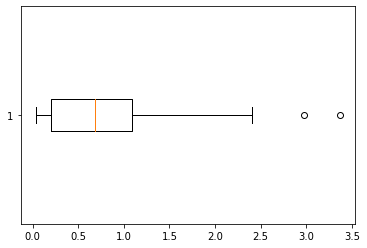

In [109]:
plt.boxplot(X1, vert = False)
None

### ЯОП

In [110]:
h = 2.344/3*np.sqrt(np.sum((X-1/N*np.sum(X))**2))/(N**0.2)
h

1.8211338223748013

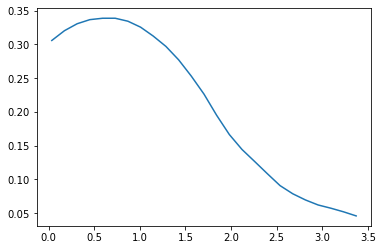

In [111]:
def q(z):
    return 0.75*(1 - z**2)
def p(z):
    return 1/(25*h)*np.sum([(q((z - i)/h) if q((z - i)/h) > 0 else 0) for i in X])
x = np.linspace(X1[0], X1[-1], 25)
plt.plot(x, [p(i) for i in x])

### Плотность распределения ср. арифм.

In [112]:
from scipy.stats import moment
def gaus(x):
    return 1/np.sqrt(2*np.pi*moment(X1, 2)/N)*np.exp(-0.5*(x-(sum(X1)/N))**2/moment(X1, 2)*N)

In [113]:
from random import choice
def bootstrap(X, func):
    M = np.array([])
    for i in range(1000):
        x = np.random.choice(X, size = len(X))
        M = np.append(M, func(x))
    return M  

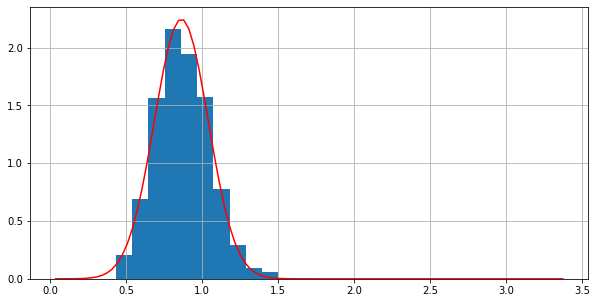

In [114]:
x = np.linspace(X1[0], X1[-1], 100)
M = bootstrap(X1, np.mean)
fig, ax = plt.subplots(1, figsize = (10, 5))
h = list(np.histogram(M))
h[0] = h[0]/1000
h[0] = [h[0][i]/(h[1][i+1]-h[1][i]) for i in range (len(h[0]))]
plt.hist(h[1][:-1], h[1], weights=h[0])
ax.plot(x, gaus(x), color = 'red')
plt.grid(True)

### Bootstrap

In [115]:
def gamma (x):
    return (moment(x, 3)/(moment(x, 2)**1.5))
M = bootstrap(X1, gamma)

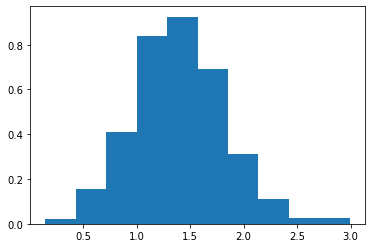

In [116]:
h = list(np.histogram(M))
fig, ax = plt.subplots()
h[0] = h[0]/1000
h[0] = [h[0][i]/(h[1][i+1]-h[1][i]) for i in range (len(h[0]))]
plt.hist(h[1][:-1], h[1], weights=h[0])
None